In [294]:
def display_img(src, description=None, is_src_url=False):
    from IPython.display import Image
    from IPython.core.display import HTML 
    if description is not None: print(description)
    if is_src_url:
        display(Image(url=src))
    else:
        display(Image(filename=src))

# Fight pages have additional information to scrape:
* #### Who is the winner?
* #### What's the weight division?
* #### How did the fight end?
* #### How many rounds did fight last? 
* #### And how many rounds could this fight potentially last?
* #### Who is the referee?

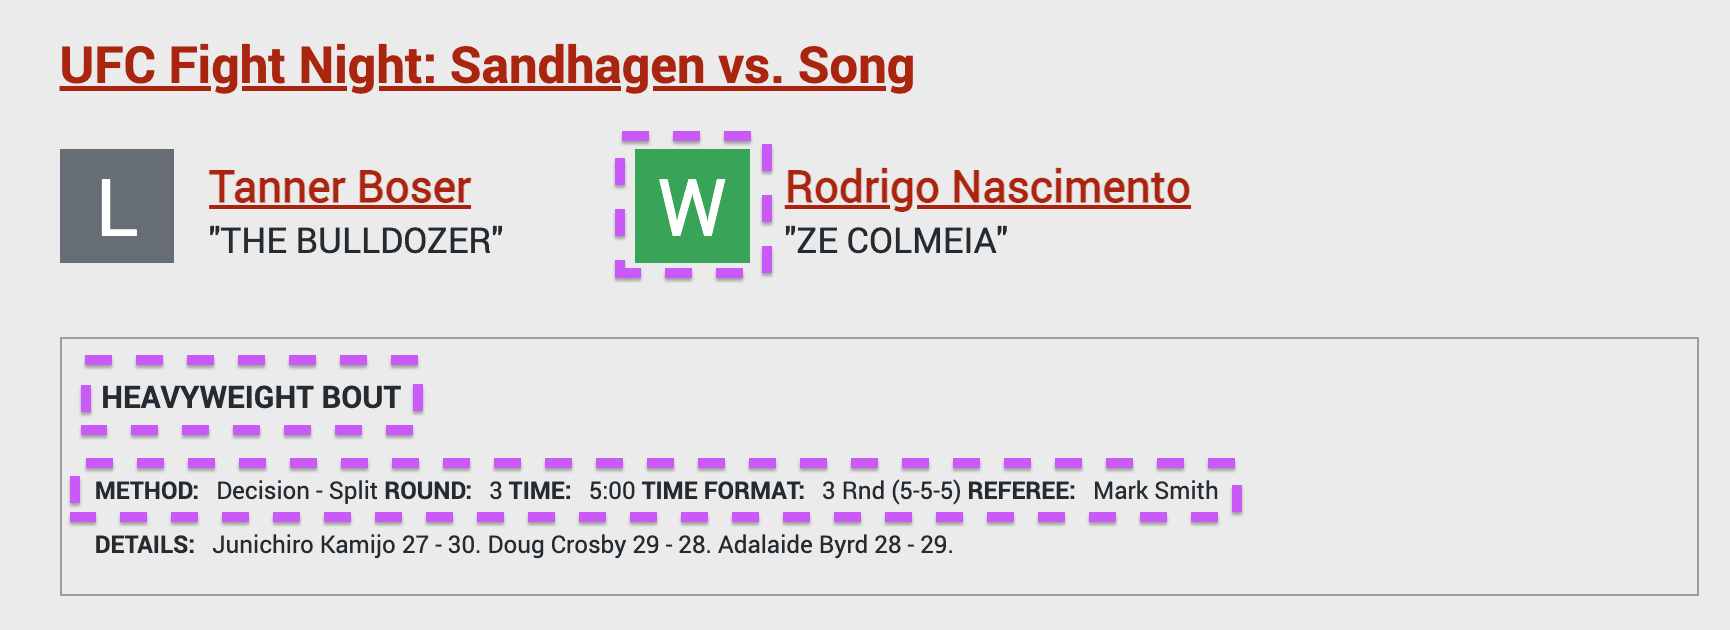

In [295]:
display_img(src='img/fights/additional info.png')

## 1) Winner

In [296]:
from bs4 import BeautifulSoup

def get_winner_name(soup) -> str:
    # soup = BeautifulSoup(page.text, "html.parser")
    try:
        results = soup.find("i", class_="b-fight-details__person-status b-fight-details__person-status_style_green").parent()
    except:
        return "Draw"
    for result in results:
        # print(result)
        # print('\n')

        if result.find("a", class_="b-link b-fight-details__person-link") != None:
            # print("#" + result.find("a", class_="b-link b-fight-details__person-link").text.strip() + "#")
            winner_name = result.find("a", class_="b-link b-fight-details__person-link").text.strip()
            break
    print(f"Winner: {winner_name}")
    return winner_name

## 2) Weight division

In [297]:
def get_weight_division(soup) -> str:
    division = soup.find("i", class_="b-fight-details__fight-title").text.strip()
    print(f"Division: {division}")
    return division

## 3) The rest. Seeing a pattern:

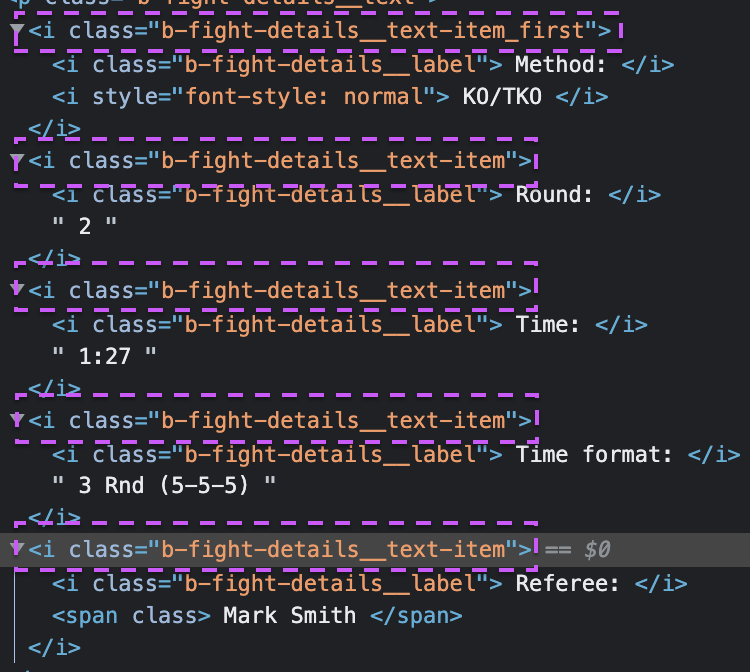

In [298]:
display_img('img/fights/additional info pattern.png')

In [299]:
import re

def get_tags(soup):
    regex = re.compile('b-fight-details__text-item*')
    results = soup.findAll("i", class_=regex)[:-1]
    return results

In [300]:
'''
Function for extracting value, as key-value relationship present on this page are 
identical and value can be extracted by splitting string on ':'
(e.g.: 'Method: KO/TKO', ...,'Referee: Mark Smith')
'''
def extract_value(keyval_string) -> str:
    return keyval_string.split(':', 1)[1].strip()

## Getting results:

In [3]:
urls_per_page = list()

for i in range(1,25):
    with open(f"urls/page_{i}", 'r') as page:
        urls_per_page.append(page.readlines())

In [4]:
def file_exists(file_path):
    import os.path
    return os.path.isfile(file_path) 

In [5]:
for i, page_urls in enumerate(urls_per_page):
    csv_name = f'additional_info/page_{i+1}'
    if file_exists(csv_name):
        print(f'File {csv_name} exists!')
        continue
    page_df = pd.DataFrame()
    for url in page_urls:
        url  = url.strip('\n')
        page = rq.get(url)
        soup = BeautifulSoup(page.text, "html.parser")
        # values = [extract_value(t.text) for t in tags]
        # print(values)
        d = dict()
        d['winner'] = get_winner_name(soup)
        d['weight'] = get_weight_division(soup)
        # the rest of the attributes have a clear pattern
        tags = get_tags(soup)
        values = []
        for t in tags:
            if t.text.find("Details") != -1:
                break
            values.append(extract_value(t.text))
        d['method'] = values[0]
        d['rounds'] = values[1]
        d['time']   = values[2]
        d['rounds_format'] = values[3]
        d['referee'] = values[4]
        # print(d)
        df = pd.DataFrame(d, index=[0])
        page_df = pd.concat([page_df, df], axis=0).reset_index(drop=True)
        display(page_df)
    page_df.to_csv(csv_name, index=False)

File additional_info/page_1 exists!
File additional_info/page_2 exists!
File additional_info/page_3 exists!
File additional_info/page_4 exists!
File additional_info/page_5 exists!
File additional_info/page_6 exists!
File additional_info/page_7 exists!
File additional_info/page_8 exists!
File additional_info/page_9 exists!
File additional_info/page_10 exists!
File additional_info/page_11 exists!
File additional_info/page_12 exists!
File additional_info/page_13 exists!
File additional_info/page_14 exists!
File additional_info/page_15 exists!
File additional_info/page_16 exists!
File additional_info/page_17 exists!
File additional_info/page_18 exists!
File additional_info/page_19 exists!
File additional_info/page_20 exists!
File additional_info/page_21 exists!
File additional_info/page_22 exists!
File additional_info/page_23 exists!
File additional_info/page_24 exists!


In [ ]:
print(values)

In [ ]:
url